In [1]:
!pip install torch torchvision matplotlib opencv-python

In [3]:
import torch
from torchvision import models, transforms
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np

# YOLOv5 model
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# R-CNN model
faster_rcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

transform = transforms.Compose([
    transforms.ToTensor()
])

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-12-9 Python-3.10.12 torch-2.5.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 251MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 100MB/s]


In [39]:
from google.colab import files
uploaded = files.upload()

image_paths = list(uploaded.keys())

Saving Screenshot 2024-12-08 at 5.24.32 PM.png to Screenshot 2024-12-08 at 5.24.32 PM (2).png
Saving Screenshot 2024-12-08 at 5.25.59 PM.png to Screenshot 2024-12-08 at 5.25.59 PM (1).png
Saving Screenshot 2024-12-08 at 5.27.20 PM.png to Screenshot 2024-12-08 at 5.27.20 PM (1).png
Saving Screenshot 2024-12-08 at 5.28.00 PM.png to Screenshot 2024-12-08 at 5.28.00 PM (1).png
Saving Screenshot 2024-12-08 at 5.28.22 PM.png to Screenshot 2024-12-08 at 5.28.22 PM (1).png


In [40]:
def detect_objects(image_path, yolo_model, faster_rcnn_model):
    # Reads image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # YOLO Detection
    start_time = time.time()
    yolo_results = yolo_model(img_rgb)
    yolo_time = time.time() - start_time
    yolo_data = yolo_results.pandas().xyxy[0]

    # Transform image for Faster R-CNN
    img_tensor = transform(img_rgb)

    # Faster R-CNN Detection
    start_time = time.time()
    outputs = faster_rcnn_model([img_tensor])
    faster_rcnn_time = time.time() - start_time

    # Process Faster R-CNN outputs
    faster_rcnn_boxes = outputs[0]['boxes'].detach().numpy()
    faster_rcnn_scores = outputs[0]['scores'].detach().numpy()
    faster_rcnn_avg_confidence = faster_rcnn_scores.mean()
    faster_rcnn_labels = outputs[0]['labels'].detach().numpy()

    yolo_detections = yolo_results.pandas().xyxy[0]
    yolo_avg_confidence = yolo_detections['confidence'].mean()


    return {
    'yolo': {
        'time': yolo_time,
        'detections': len(yolo_detections),
        'avg_confidence': yolo_avg_confidence
    },
    'faster_rcnn': {
        'time': faster_rcnn_time,
        'detections': len(faster_rcnn_boxes),
        'avg_confidence': faster_rcnn_avg_confidence
    }
}


In [44]:
import pandas as pd

#Image paths
image_paths = [
    'Screenshot 2024-12-08 at 5.24.32 PM.png',
    'Screenshot 2024-12-08 at 5.28.22 PM.png',
    'Screenshot 2024-12-08 at 5.25.59 PM.png',
    'Screenshot 2024-12-08 at 5.27.20 PM.png',
    'Screenshot 2024-12-08 at 5.28.00 PM.png'
]


results = []

for img_path in image_paths:
    res = detect_objects(img_path, yolo_model, faster_rcnn_model)
    results.append({
    'Image': img_path,
    'YOLO_Time': res['yolo']['time'],
    'YOLO_Detections': res['yolo']['detections'],
    'YOLO_Avg_Confidence': res['yolo']['avg_confidence'],
    'FasterRCNN_Time': res['faster_rcnn']['time'],
    'FasterRCNN_Detections': res['faster_rcnn']['detections'],
    'FasterRCNN_Avg_Confidence': res['faster_rcnn']['avg_confidence']
})

results_df = pd.DataFrame(results)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

In [45]:
results_df.head()

,Image,YOLO_Time,YOLO_Detections,YOLO_Avg_Confidence,FasterRCNN_Time,FasterRCNN_Detections,FasterRCNN_Avg_Confidence
0,Screenshot 2024-12-08 at 5.24.32 PM.png,0.649621,13,0.623093,8.126107,60,0.358925
1,Screenshot 2024-12-08 at 5.28.22 PM.png,0.354868,4,0.681583,6.745378,6,0.490763
2,Screenshot 2024-12-08 at 5.25.59 PM.png,0.585541,3,0.909422,6.371957,9,0.510856
3,Screenshot 2024-12-08 at 5.27.20 PM.png,0.343222,10,0.663688,6.957130,51,0.381635
4,Screenshot 2024-12-08 at 5.28.00 PM.png,0.670585,2,0.756347,5.548210,7,0.508616


### **Part 2**

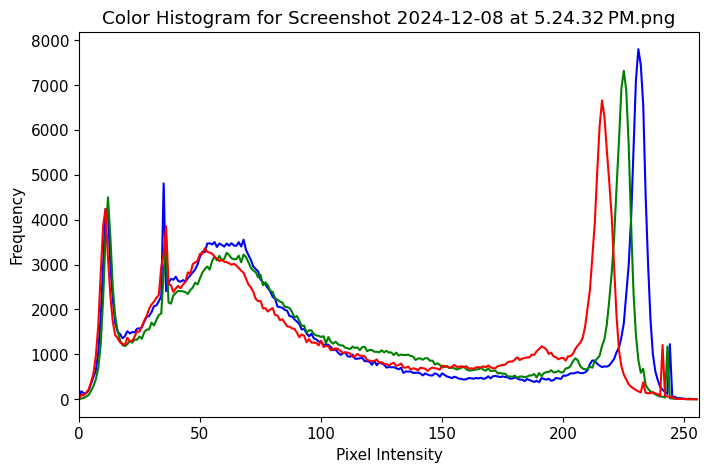

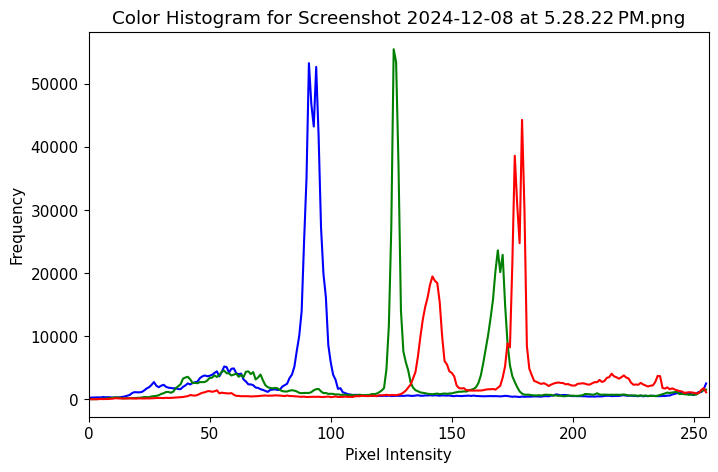

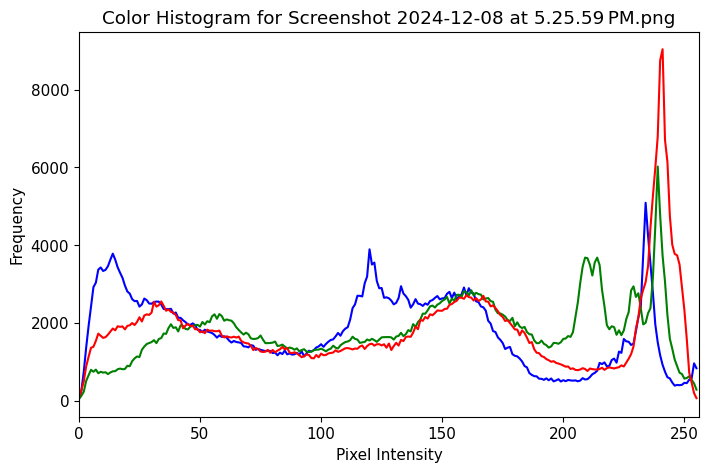

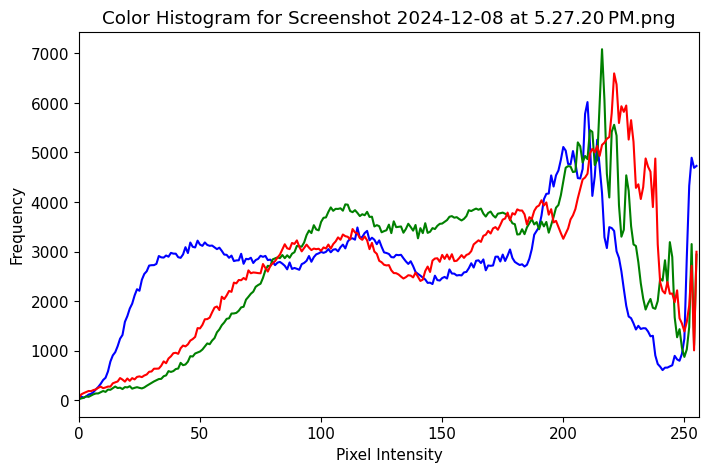

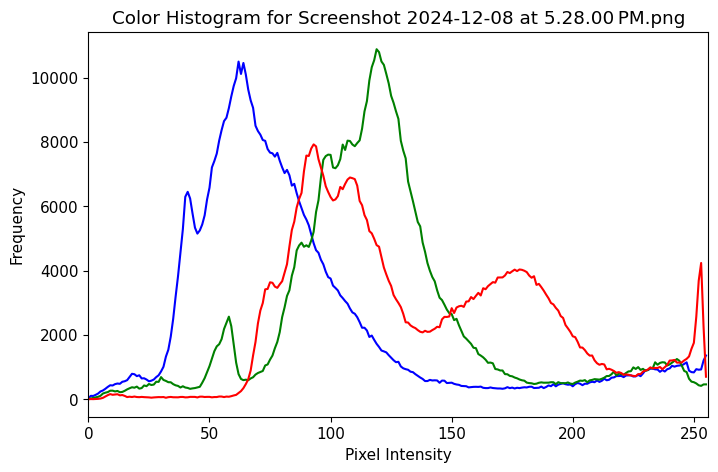

In [46]:
# Distribution of Colors in Images
def color_histogram(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    colors = ('b', 'g', 'r')  # Only looking at blue, green, red
    plt.figure(figsize=(8, 5))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title(f"Color Histogram for {image_path}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

for img_path in image_paths:
    color_histogram(img_path)



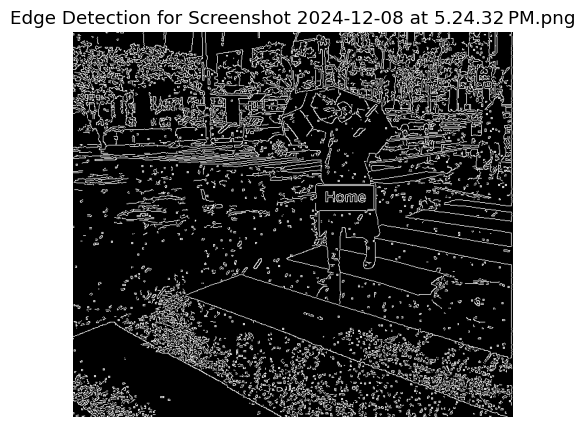

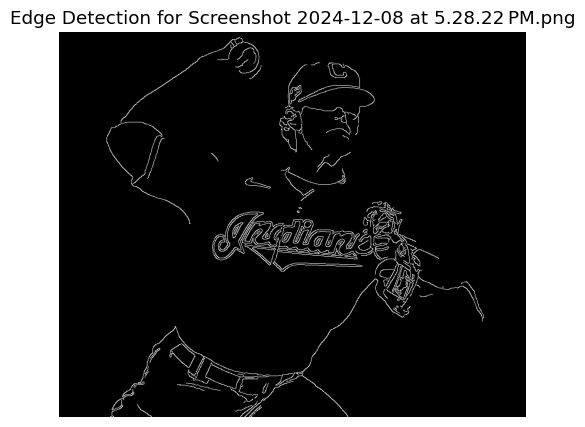

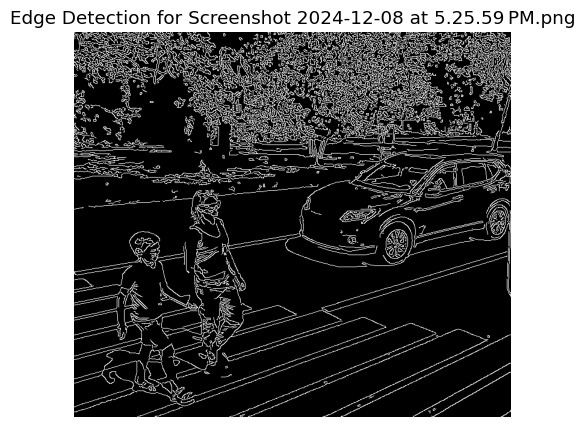

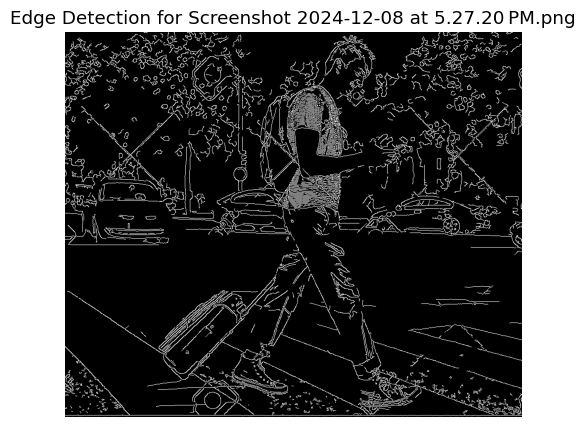

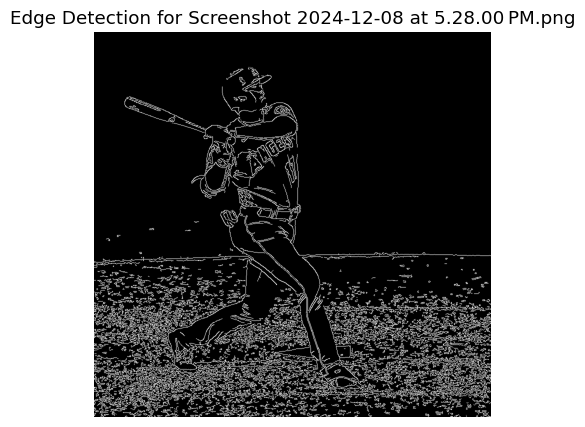

In [47]:
# Identifying Object boundaries
def edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    edges = cv2.Canny(img, 100, 200)
    plt.figure(figsize=(8, 5))
    plt.imshow(edges, cmap='gray')
    plt.title(f"Edge Detection for {image_path}")
    plt.axis('off')
    plt.show()


for img_path in image_paths:
    edge_detection(img_path)
